In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
import sklearn.manifold.t_sne
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook
import seaborn as sns

In [2]:
datafile = "./forestfires.csv"
df=pd.read_csv(datafile)

In [3]:
object_columns=df.select_dtypes(['object']).columns
df[object_columns]=df[object_columns].apply(lambda x: x.astype('category'))
cat_columns=df.select_dtypes(['category']).columns
df[cat_columns]=df[cat_columns].apply(lambda x: x.cat.codes)

In [4]:
df['area_log']= np.log(df.area +1)
df['area_bins'] = pd.qcut(df['area_log'],2, labels=[0,1])
df.drop(['area','area_log'],axis=1,inplace=True)
y=df.pop('area_bins')
X=df
RS=123
time_start = time.time()
fashion_tsne_2d = TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 259.124420
[t-SNE] KL divergence after 500 iterations: 0.182829
t-SNE Time elapsed: 1.6175670623779297 seconds


In [5]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [6]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [7]:
# Utility function to visualize the outputs of t-SNE
def fashion_scatter_2d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
#     plt.show()

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

<IPython.core.display.Javascript object>


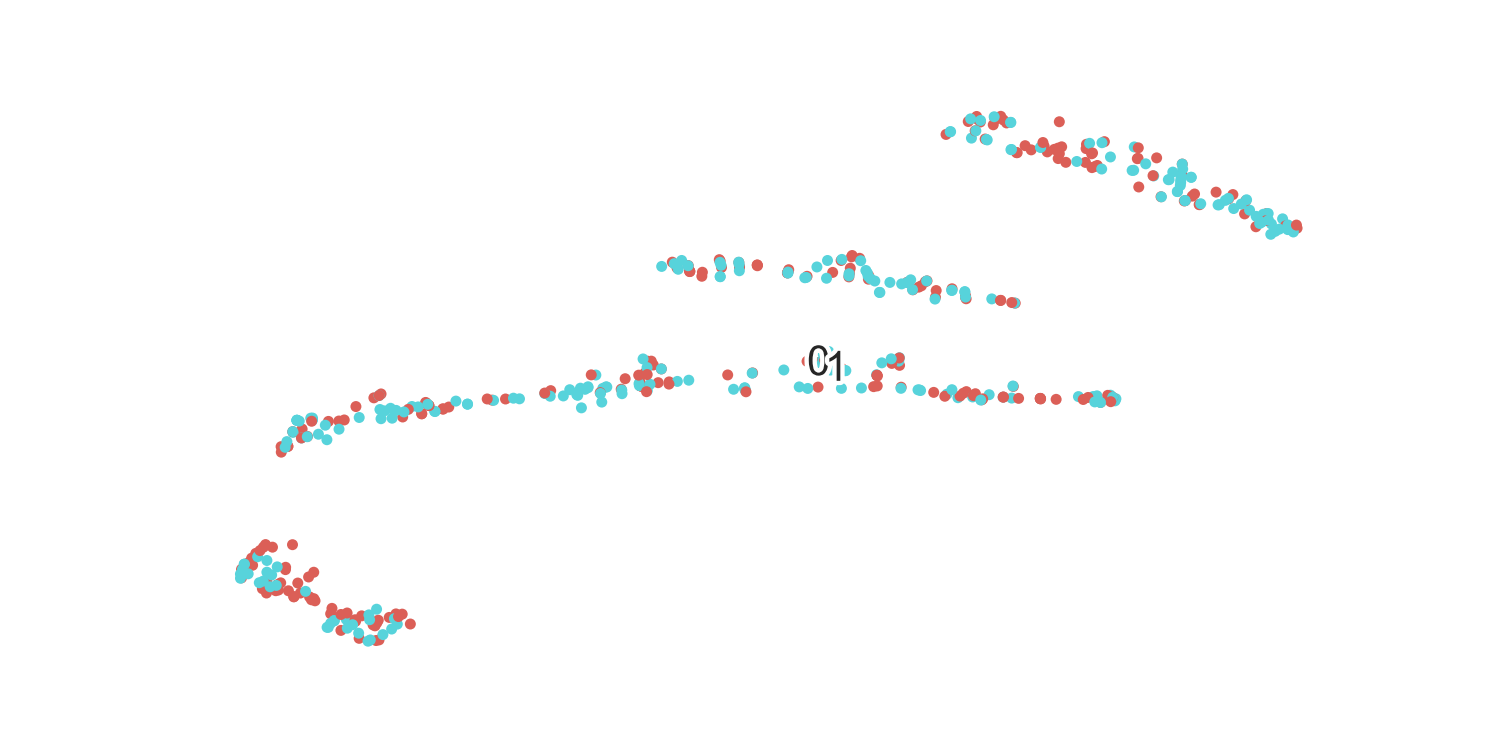

(<Figure size 1200x600 with 1 Axes>,
 [Text(1.8034403, -2.7642674, '0'), Text(2.488206, -3.3130565, '1')])

In [8]:
%matplotlib notebook
fashion_scatter_2d(fashion_tsne_2d, y)

In [9]:
RS=123
from sklearn.manifold import TSNE
import time
time_start = time.time()
fashion_tsne_3d = TSNE(n_components=3,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time : {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.000s...
[t-SNE] Computed neighbors for 517 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 382.620056
[t-SNE] KL divergence after 500 iterations: 2.730860
t-SNE Time : 6.395201921463013 seconds


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
def fashion_scatter_3d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 6))
    ax = f.add_subplot(111, projection='3d')
    sc = ax.scatter(x[:,0], x[:,1],x[:,2], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext , ztext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext,ztext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

<IPython.core.display.Javascript object>


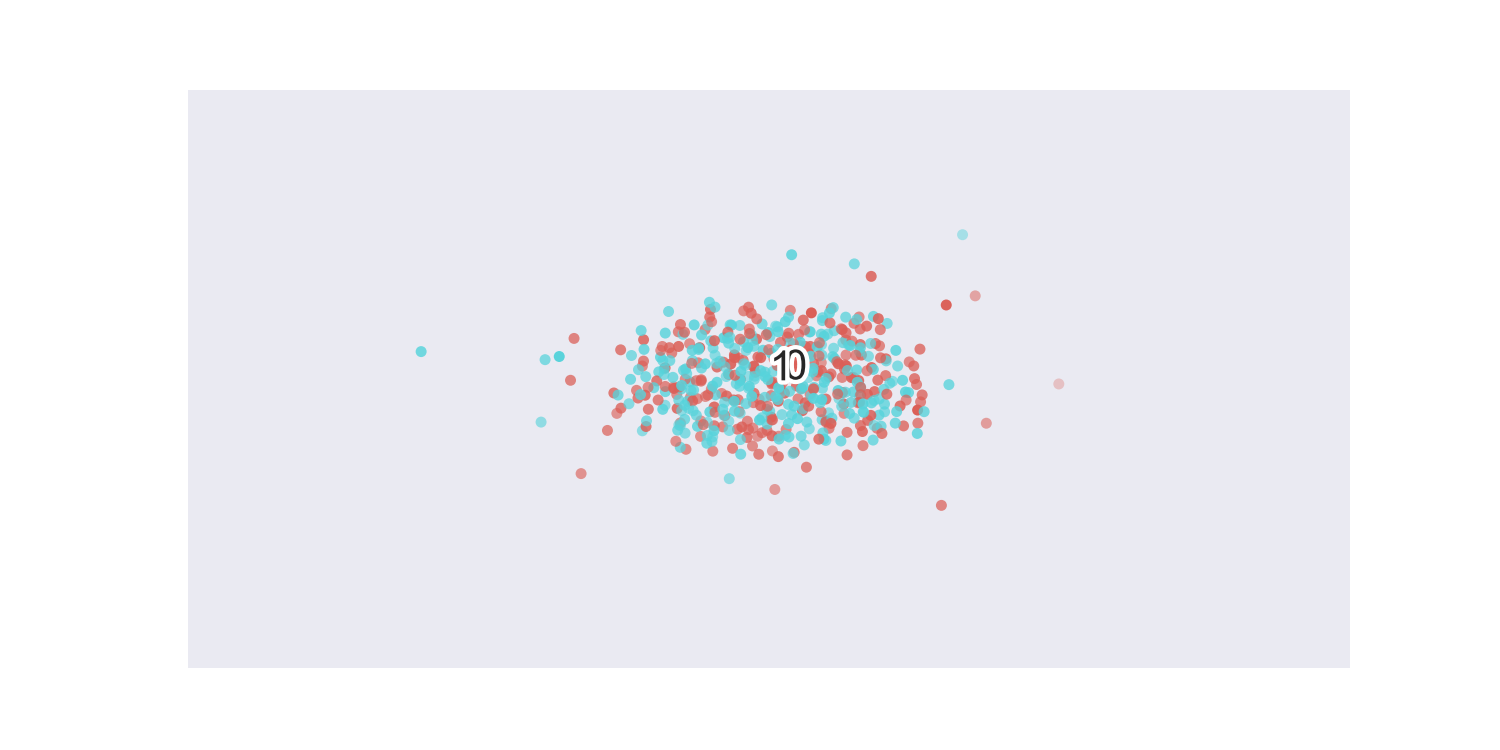

(<Figure size 1200x600 with 1 Axes>,
 [Text(3.1309557, 3.5576699, '0'), Text(-1.5808876, -0.59892106, '1')])

In [12]:
%matplotlib notebook
fashion_scatter_3d(fashion_tsne_3d, y)

# Animating T-SNE Algorithm in 3-D

## Monkey Patching
The initial TSNE algoritm doesnt store the checkpoint embedding. Rather it returns the embeddings which are a result of N iterations. Therefore, we should perform monkey patching over the gradient descent algorithm in the sklearn.manifold.t_sne module 

In [13]:
#import necessary modules for the gradient descent
import warnings
from time import time
import numpy as np
from scipy import linalg
import scipy.sparse as sp
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.sparse import csr_matrix

In [14]:
#3-D array which stores the checkpoint embeddings after each iterations
checkpoints = []

#Following is the gradient descent algoritm from the sklearn 0.21.3 module
def _gradient_descent(objective, p0, it, n_iter,
                      n_iter_check=1, n_iter_without_progress=300,
                      momentum=0.8, learning_rate=200.0, min_gain=0.01,
                      min_grad_norm=1e-7, verbose=0, args=None, kwargs=None):
    if args is None:
        args = []
    if kwargs is None:
        kwargs = {}

    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = i = it

    tic = time.time()
    for i in range(it, n_iter):
        
        #Append checkpoint embeddings into checkpoints
        checkpoints.append(p.copy())
        
        check_convergence = (i + 1) % n_iter_check == 0
        # only compute the error when needed
        kwargs['compute_error'] = check_convergence or i == n_iter - 1

        error, grad = objective(p, *args, **kwargs)
        grad_norm = linalg.norm(grad)

        inc = update * grad < 0.0
        dec = np.invert(inc)
        gains[inc] += 0.2
        gains[dec] *= 0.8
        np.clip(gains, min_gain, np.inf, out=gains)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

        if check_convergence:
            toc = time.time()
            duration = toc - tic
            tic = toc

            if verbose >= 2:
                print("[t-SNE] Iteration %d: error = %.7f,"
                      " gradient norm = %.7f"
                      " (%s iterations in %0.3fs)"
                      % (i + 1, error, grad_norm, n_iter_check, duration))

            if error < best_error:
                best_error = error
                best_iter = i
            elif i - best_iter > n_iter_without_progress:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: did not make any progress "
                          "during the last %d episodes. Finished."
                          % (i + 1, n_iter_without_progress))
                break
            if grad_norm <= min_grad_norm:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: gradient norm %f. Finished."
                          % (i + 1, grad_norm))
                break

    return p, error, i

In [15]:
#Monkey patching happens here
sklearn.manifold.t_sne._gradient_descent = _gradient_descent

## Training

In [16]:
#Train the algorithm
RS=123
import time
time_start = time.time()
X_proj = TSNE(n_components=2, perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time : {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.000s...
[t-SNE] Computed neighbors for 517 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 259.124420
[t-SNE] KL divergence after 500 iterations: 0.182829
t-SNE Time : 1.7436363697052002 seconds


In [17]:
#CHeckpoints required in numpy format
X_iter = np.dstack(checkpoint.reshape(-1, 2) for checkpoint in checkpoints)

C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


## Animating
Animating the X_iter stack using matplotlib.animation module

<IPython.core.display.Javascript object>


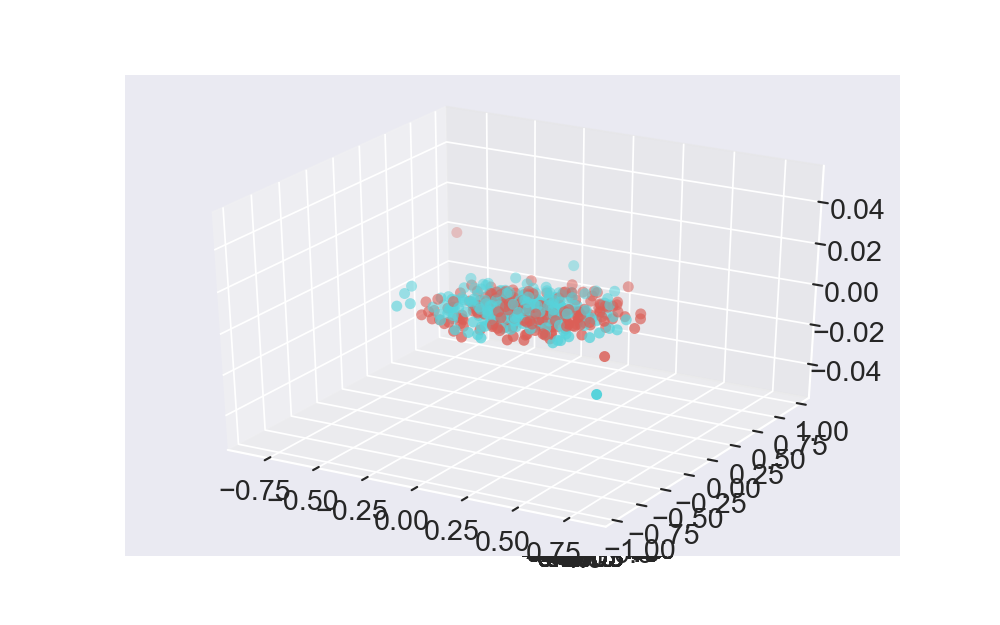

In [18]:
# Number of frames
num_frame = 30 

# Frame per sec
fps = 10 

fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(111, projection='3d')

#Update function which changes with frame number
def update(ifrm): 
    #Number of colors required is equal to the number of classes
    num_classes = len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    x = X_iter[..., ifrm]
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[y.astype(np.int)])

ani = animation.FuncAnimation(fig, update, num_frame, interval=1000/fps)